- pictures are not normalized
- lets exclude trousers (class 1) instead of ankle boots

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("tensorflow: ", tf.__version__) #1.14.0
print("tensorflow probability: ", tfp.__version__) #0.7.0

tensorflow:  1.14.0
tensorflow probability:  0.7.0


In [84]:
#import the fashion mnist dataset (from Zalando)
fashion_mnist = keras.datasets.fashion_mnist
data = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [85]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [86]:
train_x = np.expand_dims(train_images, axis=3)
print(train_images.shape, train_x.shape)

(60000, 28, 28) (60000, 28, 28, 1)


In [87]:
train_y = train_labels
print(train_labels.shape, train_y.shape)
test_y = test_labels
print(test_labels.shape, test_y.shape)

(60000,) (60000,)
(10000,) (10000,)


In [88]:
test_x = np.expand_dims(test_images, axis=3)
print(test_images.shape, train_y.shape)

(10000, 28, 28) (60000,)


# Exclude an entire class from training

First we are going to exclude an entire class from the training set. Randomly we went for the class 9.

In [89]:
train_x = np.delete(train_x, np.where(train_y==1)[0], axis = 0)
print(train_x.shape)

(54000, 28, 28, 1)


In [90]:
train_y = np.delete(train_y, np.where(train_y==1)[0], axis = 0)
print(train_y.shape)

(54000,)


In [9]:
print(train_x.shape, train_y.shape)

(54000, 28, 28, 1) (54000,)


In [10]:
train_y = np.array(pd.get_dummies(train_y))

In [11]:
# test_y = np.array(pd.get_dummies(test_y))

In [12]:
print(train_y.shape, test_y.shape)

(54000, 9) (10000,)


In [13]:
#adjust labels
class_names_adj = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag']

## create test and validation set

In [20]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.4, random_state = 22)

# Construct a baseline CNN

In [51]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras import Sequential

model = Sequential()
model.add(Convolution2D(8,kernel_size=(3,3),padding="same", activation = 'relu',input_shape=(28,28,1)))
model.add(Convolution2D(8,kernel_size=(3,3),padding="same", activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(16,kernel_size=(3,3),padding="same", activation = 'relu'))
model.add(Convolution2D(16,kernel_size=(3,3),padding="same", activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dropout((0.5)))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout((0.5)))
model.add(Dense(9, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 8)         584       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)              

In [15]:
model_b = keras.Sequential([
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28,28,1)),
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(16, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout((0.5)),
    keras.layers.Dense(9, activation='softmax')
])

In [52]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 8)         584       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)              

In [53]:
history_b = model.fit(train_x, train_y, validation_data = (val_x, val_y), epochs = 10)

Train on 32400 samples, validate on 21600 samples
Epoch 1/10
32400/32400 [==============================] - 42s 1ms/sample - loss: 0.9703 - acc: 0.6672 - val_loss: 0.4726 - val_acc: 0.8399
Epoch 2/10
32400/32400 [==============================] - 46s 1ms/sample - loss: 0.5492 - acc: 0.8069 - val_loss: 0.4019 - val_acc: 0.8646
Epoch 3/10
32400/32400 [==============================] - 45s 1ms/sample - loss: 0.4644 - acc: 0.8376 - val_loss: 0.3445 - val_acc: 0.8800
Epoch 4/10
32400/32400 [==============================] - 42s 1ms/sample - loss: 0.4209 - acc: 0.8530 - val_loss: 0.3568 - val_acc: 0.8730
Epoch 5/10
32400/32400 [==============================] - 44s 1ms/sample - loss: 0.3960 - acc: 0.8634 - val_loss: 0.3134 - val_acc: 0.8869
Epoch 6/10
32400/32400 [==============================] - 49s 2ms/sample - loss: 0.3726 - acc: 0.8698 - val_loss: 0.3120 - val_acc: 0.8865
Epoch 7/10
32400/32400 [==============================] - 43s 1ms/sample - loss: 0.3534 - acc: 0.8784 - val_loss: 0.

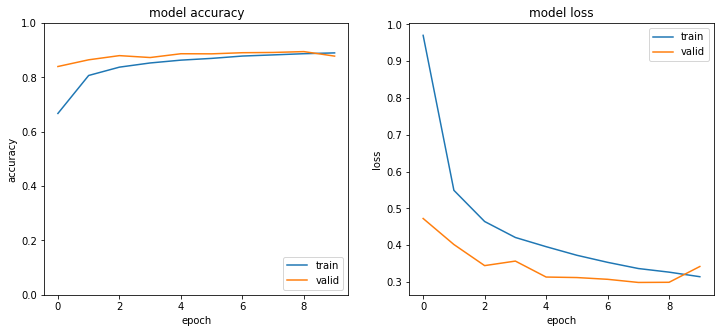

In [54]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_b.history['acc'])
plt.plot(history_b.history['val_acc'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history_b.history['loss'])
plt.plot(history_b.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [161]:
#model_b.evaluate(test_x, test_y)

# create a model with MC Dropout

In [55]:
model_mc = Sequential()
model_mc.add(Convolution2D(8,kernel_size=(3,3),padding="same", activation = 'relu',input_shape=(28,28,1)))
model_mc.add(Dropout((0.3)))
model_mc.add(Convolution2D(8,kernel_size=(3,3),padding="same", activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(MaxPooling2D((2,2)))
model_mc.add(Dropout((0.3)))
model_mc.add(Convolution2D(16,kernel_size=(3,3),padding="same", activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(Convolution2D(16,kernel_size=(3,3),padding="same", activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(MaxPooling2D((2,2)))
model_mc.add(Dropout((0.3)))
model_mc.add(Flatten())
model_mc.add(Dropout((0.3)))
model_mc.add(Dense(100, activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(Dense(100, activation = 'relu'))
model_mc.add(Dropout((0.3)))
model_mc.add(Dense(9, activation = 'softmax'))

In [56]:
model_mc.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_mc.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
dropout_28 (Dropout)         (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 8)         584       
_________________________________________________________________
dropout_29 (Dropout)         (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 16)       

In [57]:
import tensorflow.keras.backend as K
model_mc_pred = K.function([model_mc.input, K.learning_phase()], [model_mc.output])

In [58]:
for i in range(0,5):
    print(model_mc_pred([train_x[0:1], 0])[0])

[[9.9698478e-01 3.5162320e-05 2.6589262e-03 4.7897583e-08 1.6883128e-06
  1.9236631e-12 7.6096119e-05 2.4338823e-04 5.3208137e-12]]
[[9.9698478e-01 3.5162320e-05 2.6589262e-03 4.7897583e-08 1.6883128e-06
  1.9236631e-12 7.6096119e-05 2.4338823e-04 5.3208137e-12]]
[[9.9698478e-01 3.5162320e-05 2.6589262e-03 4.7897583e-08 1.6883128e-06
  1.9236631e-12 7.6096119e-05 2.4338823e-04 5.3208137e-12]]
[[9.9698478e-01 3.5162320e-05 2.6589262e-03 4.7897583e-08 1.6883128e-06
  1.9236631e-12 7.6096119e-05 2.4338823e-04 5.3208137e-12]]
[[9.9698478e-01 3.5162320e-05 2.6589262e-03 4.7897583e-08 1.6883128e-06
  1.9236631e-12 7.6096119e-05 2.4338823e-04 5.3208137e-12]]


In [59]:
for i in range(0,5):
    print(model_mc_pred([train_x[0:1], 1])[0])

[[9.9999201e-01 5.8631236e-18 7.3861978e-10 1.9158753e-34 5.1157726e-06
  5.1506435e-30 2.8198524e-17 2.8401748e-06 8.1712320e-23]]
[[1.0000000e+00 3.1181809e-21 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.9124155e-26 1.8668823e-33 0.0000000e+00]]
[[3.2052892e-23 1.8746824e-18 3.5789590e-19 9.9011116e-25 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 4.6093325e-09]]
[[1.61771790e-33 6.38274968e-01 3.61724496e-01 1.08034635e-23
  2.70563736e-13 7.77071209e-22 5.38732934e-07 2.53248992e-30
  5.15858771e-38]]
[[4.3321368e-22 2.8970964e-23 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [60]:
history_mc = model_mc.fit(train_x, train_y, validation_data = (val_x, val_y), epochs = 15) #needs 15 epochs to reach an accuracy over 08%

Train on 32400 samples, validate on 21600 samples
Epoch 1/15
32400/32400 [==============================] - 57s 2ms/sample - loss: 3.1144 - acc: 0.2181 - val_loss: 1.8964 - val_acc: 0.2218
Epoch 2/15
32400/32400 [==============================] - 63s 2ms/sample - loss: 1.3664 - acc: 0.4371 - val_loss: 1.1486 - val_acc: 0.6147
Epoch 3/15
32400/32400 [==============================] - 59s 2ms/sample - loss: 0.9949 - acc: 0.6036 - val_loss: 0.9032 - val_acc: 0.7310
Epoch 4/15
32400/32400 [==============================] - 59s 2ms/sample - loss: 0.8349 - acc: 0.6770 - val_loss: 0.8421 - val_acc: 0.7261
Epoch 5/15
32400/32400 [==============================] - 59s 2ms/sample - loss: 0.7566 - acc: 0.7075 - val_loss: 0.7680 - val_acc: 0.7490
Epoch 6/15
32400/32400 [==============================] - 60s 2ms/sample - loss: 0.6978 - acc: 0.7303 - val_loss: 0.7270 - val_acc: 0.7528
Epoch 7/15
32400/32400 [==============================] - 60s 2ms/sample - loss: 0.6553 - acc: 0.7476 - val_loss: 0.

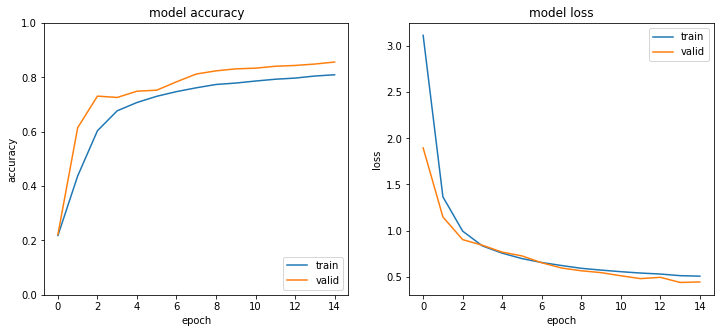

In [61]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_mc.history['acc'])
plt.plot(history_mc.history['val_acc'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history_mc.history['loss'])
plt.plot(history_mc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

Test the predictions

In [62]:
zero_x = test_x[np.where(test_y==0)[0]]
zero_y = test_y[np.where(test_y==0)[0]]

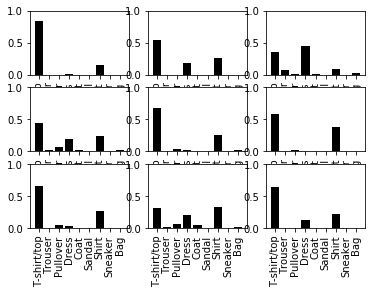

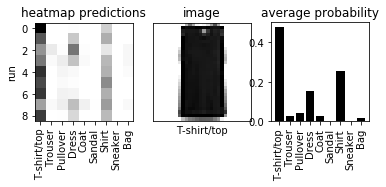

[0.47633818 0.02601197 0.04222186 0.1543478  0.02828821 0.00151074
 0.25539818 0.00065083 0.01523221]


In [63]:
x = [0,1,2,3,4,5,6,7,8]
predictions = model_mc_pred([zero_x[1:2], 1])[0]
for i in range(100):
    pred = model_mc_pred([zero_x[1:2], 1])[0]
    predictions = np.append(predictions, pred, axis = 0)
    
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(9), class_names_adj, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()
    #print(i, predictions)
#x = [1,2,3,4,5,6,7,8,9]
#y = pred[0].tolist()
#plt.bar(x, y)
#print(predictions)
plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:9], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(9), class_names_adj, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(zero_x[1:2][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names_adj[zero_y[2]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(9), class_names_adj, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

In [64]:
#try to find a probability of the probabilities per class??
df_predictions = pd.DataFrame(predictions)

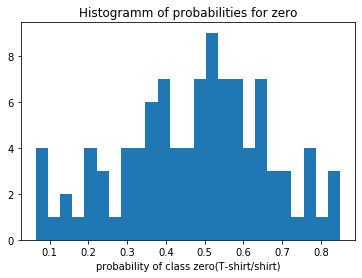

In [65]:
df_predictions[0] # all the probabilities for the class 0 = T-shirt/top
plt.hist(df_predictions[0], 25)
plt.xlabel('probability of class zero(T-shirt/shirt)')
plt.title('Histogramm of probabilities for zero')
plt.show()

In [66]:
# Try to create a Bernoulli p with all the info we have
import math
confidence = 0.5 #if probability is higher than 50%, we are already happy
prob = []
std = []
for i in [0,1,2,3,4,5,6,7,8]:
    positive = df_predictions.loc[df_predictions[i]>confidence]
    p = positive.shape[0]/df_predictions.shape[0]
    v = p*(1-p)
    s = math.sqrt(v)
    prob.append(p)
    std.append(s)

In [67]:
upper = np.array(prob)+np.array(std)
lower = np.array(prob)-np.array(std)

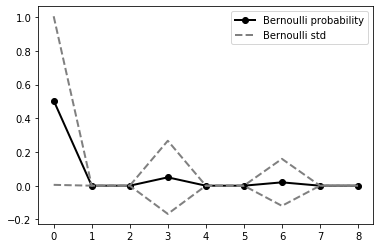

In [68]:
plt.plot(x,prob, marker='o', color='black', linewidth=2, label='Bernoulli probability')
plt.plot(x,upper, marker='', color='grey', linewidth=2, linestyle='dashed', label = 'Bernoulli std')
plt.plot(x,lower, marker='', color='grey', linewidth=2, linestyle='dashed')
plt.legend()

## check out the picture the network has never seen before

In [69]:
nine_x = test_x[np.where(test_y==9)[0]]
nine_y = test_y[np.where(test_y==9)[0]]
picture = 100
picture_end = picture+1

In [70]:
pred = model_mc_pred([nine_x[picture:picture_end], 1])[0]

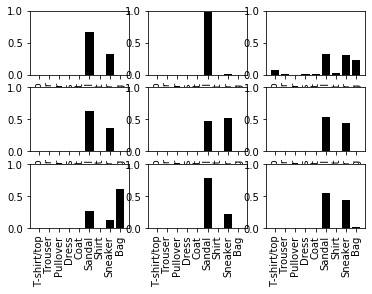

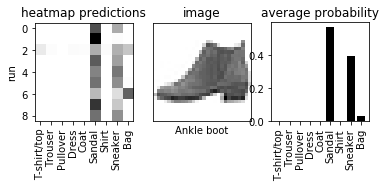

[1.5862590e-03 2.7515591e-04 1.0868613e-04 1.5540585e-03 2.3050785e-04
 5.7060468e-01 2.4971008e-04 3.9335665e-01 3.2034293e-02]


In [71]:
predictions = model_mc_pred([nine_x[picture:picture_end], 1])[0]
for i in range(100):
    pred = model_mc_pred([nine_x[picture:picture_end], 1])[0]
    #print(pred)
    predictions = np.append(predictions, pred, axis = 0)
    #print(i, predictions)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(9), class_names_adj, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()
    #print(i, predictions)
#x = [1,2,3,4,5,6,7,8,9]
#y = pred[0].tolist()
#plt.bar(x, y)
#print(predictions)
plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:9], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(9), class_names_adj, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(nine_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[nine_y[picture]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(9), class_names, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

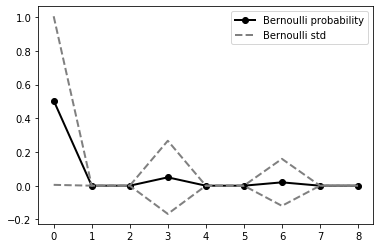

In [72]:
# Try to create a Bernoulli p with all the info we have
import math
confidence = 0.5 #if probability is higher than 50%, we are already happy
prob = []
std = []

for i in [0,1,2,3,4,5,6,7,8]:
    positive = df_predictions.loc[df_predictions[i]>confidence]
    p = positive.shape[0]/df_predictions.shape[0]
    v = p*(1-p)
    s = math.sqrt(v)
    prob.append(p)
    std.append(s)
    
upper = np.array(prob)+np.array(std)
lower = np.array(prob)-np.array(std)

plt.plot(x,prob, marker='o', color='black', linewidth=2, label='Bernoulli probability')
plt.plot(x,upper, marker='', color='grey', linewidth=2, linestyle='dashed', label = 'Bernoulli std')
plt.plot(x,lower, marker='', color='grey', linewidth=2, linestyle='dashed')
plt.legend()

In [74]:
model_mc2 = model_mc

In [75]:
model_mc2_pred = K.function([model_mc2.input, K.learning_phase()], [model_mc2.output])

In [76]:
history_mc2 = model_mc2.fit(train_x, train_y, epochs = 10)

Epoch 1/10
 1792/32400 [>.............................] - ETA: 45s - loss: 0.4949 - acc: 0.8103

KeyboardInterrupt: 

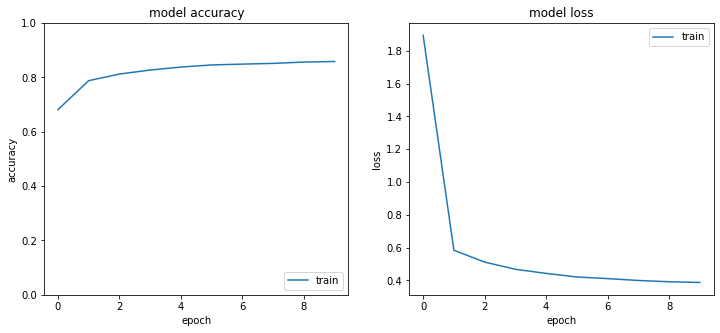

In [155]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_mc2.history['acc'])
#plt.plot(history_b.history['val_accuracy'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history_mc2.history['loss'])
#plt.plot(history_b.history['va_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

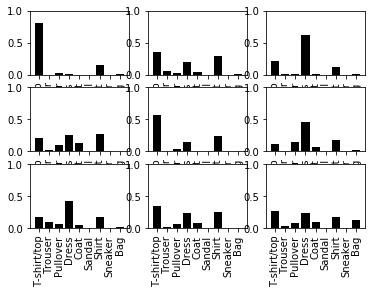

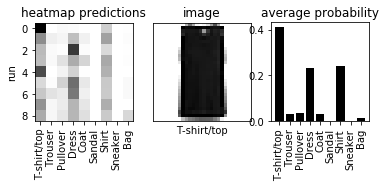

[0.41127336 0.03139492 0.03755271 0.23207402 0.03092972 0.00091755
 0.24246159 0.00067982 0.01271616]


In [77]:
predictions = model_mc2_pred([zero_x[1:2], 1])[0]
for i in range(100):
    pred = model_mc2_pred([zero_x[1:2], 1])[0]
    predictions = np.append(predictions, pred, axis = 0)
    #print(i, predictions)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(9), class_names_adj, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()
    #print(i, predictions)
#x = [1,2,3,4,5,6,7,8,9]
#y = pred[0].tolist()
#plt.bar(x, y)
#print(predictions)
plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:9], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(9), class_names_adj, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(zero_x[1:2][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names_adj[zero_y[2]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(9), class_names_adj, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

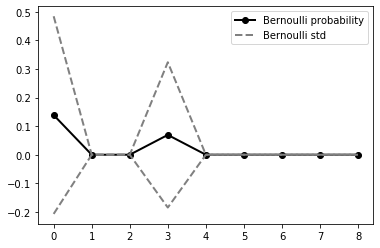

In [78]:
# Try to create a Bernoulli p with all the info we have
import math
confidence = 0.6 #if probability is higher than 50%, we are already happy
prob = []
std = []
df_predictions = pd.DataFrame(predictions)

for i in [0,1,2,3,4,5,6,7,8]:
    positive = df_predictions.loc[df_predictions[i]>confidence]
    p = positive.shape[0]/df_predictions.shape[0]
    v = p*(1-p)
    s = math.sqrt(v)
    prob.append(p)
    std.append(s)
    
upper = np.array(prob)+np.array(std)
lower = np.array(prob)-np.array(std)

plt.plot(x,prob, marker='o', color='black', linewidth=2, label='Bernoulli probability')
plt.plot(x,upper, marker='', color='grey', linewidth=2, linestyle='dashed', label = 'Bernoulli std')
plt.plot(x,lower, marker='', color='grey', linewidth=2, linestyle='dashed')
plt.legend()

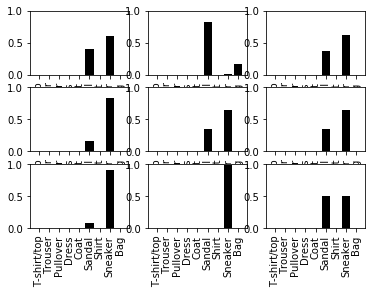

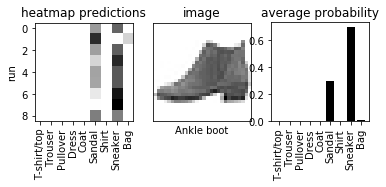

[5.8423182e-05 2.8417538e-05 7.9218509e-05 3.8504571e-05 1.9068551e-05
 2.9652306e-01 3.0878764e-05 6.9735682e-01 5.8657355e-03]


In [79]:
predictions = model_mc2_pred([nine_x[picture:picture_end], 1])[0]
for i in range(100):
    pred = model_mc2_pred([nine_x[picture:picture_end], 1])[0]
    #print(pred)
    predictions = np.append(predictions, pred, axis = 0)
    #print(i, predictions)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(9), class_names_adj, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()
#print(predictions)
plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:9], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(9), class_names_adj, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(nine_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[nine_y[picture]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(9), class_names, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

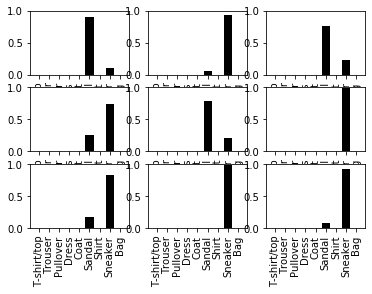

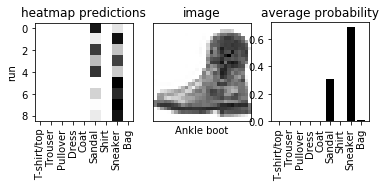

[1.1574771e-03 1.6026611e-04 2.9836592e-04 7.8195019e-04 1.3806068e-04
 3.0745125e-01 2.5391817e-04 6.8431395e-01 5.4447781e-03]


In [80]:
# try another picture
picture = 7
picture_end = picture + 1
predictions = model_mc2_pred([nine_x[picture:picture_end], 1])[0]
for i in range(100):
    pred = model_mc2_pred([nine_x[picture:picture_end], 1])[0]
    #print(pred)
    predictions = np.append(predictions, pred, axis = 0)
    #print(i, predictions)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(9), class_names_adj, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()
#print(predictions)
plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:9], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(9), class_names_adj, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(nine_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[nine_y[picture]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(9), class_names, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

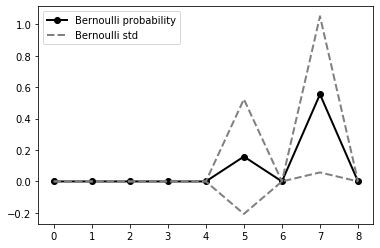

In [81]:
# Try to create a Bernoulli p with all the info we have
import math
confidence = 0.7 #if probability is higher than 50%, we are already happy
prob = []
std = []
df_predictions = pd.DataFrame(predictions)

for i in [0,1,2,3,4,5,6,7,8]:
    positive = df_predictions.loc[df_predictions[i]>confidence]
    p = positive.shape[0]/df_predictions.shape[0]
    v = p*(1-p)
    s = math.sqrt(v)
    prob.append(p)
    std.append(s)
    
upper = np.array(prob)+np.array(std)
lower = np.array(prob)-np.array(std)

plt.plot(x,prob, marker='o', color='black', linewidth=2, label='Bernoulli probability')
plt.plot(x,upper, marker='', color='grey', linewidth=2, linestyle='dashed', label = 'Bernoulli std')
plt.plot(x,lower, marker='', color='grey', linewidth=2, linestyle='dashed')
plt.legend()

# predict all the unseen pictures

In [83]:
lo = range(nine_x.shape[0]-1)
#lo = range(1,10,1)
means = pd.DataFrame(columns=[0,1,2,3,4,5,6,7,8])
for i in lo:
    predictions = pd.DataFrame(columns=[0,1,2,3,4,5,6,7,8])
    for i in range(100):
        pred = model_mc2_pred([nine_x[i:i+1], 1])[0][0]
        pred = pd.DataFrame(pred.reshape(-1, len(pred)), columns=[0,1,2,3,4,5,6,7,8])
        #print(pred)
        predictions = predictions.append(pred)
        #print(predictions)
    m = predictions.mean()
    #m = pd.DataFrame(m.reshape(-1, len(m)), columns=[0,1,2,3,4,5,6,7,8])
    means = means.append(m, ignore_index=True)
    #np.append(means, m, axis = 0)

KeyboardInterrupt: 

In [ ]:
mean_of_means = means.mean()
plt.bar(x,mean_of_means, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(9), class_names_adj, rotation = 90)
plt.title('Mean of means of predictions for all Ankle Boot pictures')

In [243]:
means

,0,1,2,3,4,5,6,7,8
0,0.000358,3.947539e-06,0.000199,0.000095,0.000079,0.467882,0.000198,0.514677,0.016508
1,0.000244,3.637802e-06,0.000026,0.001403,0.000034,0.492591,0.000241,0.480924,0.024535
2,0.000221,7.140024e-05,0.000028,0.000091,0.000019,0.478033,0.000582,0.504365,0.016590
3,0.000165,1.814377e-05,0.000148,0.000137,0.000046,0.452903,0.001667,0.523190,0.021725
4,0.000178,7.820311e-07,0.000067,0.000352,0.000039,0.467002,0.000238,0.510588,0.021535
5,0.000164,2.499446e-06,0.000114,0.000318,0.000095,0.439178,0.000495,0.542037,0.017597
6,0.000271,1.258840e-05,0.000026,0.000058,0.000029,0.481825,0.000255,0.499150,0.018373
7,0.000623,2.878837e-06,0.000105,0.000051,0.000019,0.489615,0.000308,0.473775,0.035502
8,0.000614,1.095955e-05,0.000052,0.000024,0.000131,0.488647,0.000519,0.495818,0.014184
9,0.000278,6.364895e-06,0.000113,0.000049,0.000398,0.459304,0.000348,0.509188,0.030315


In [291]:
#lo = range(nine_x.shape[0]-1)
lo = range(1,100,1)
bernoulli = pd.DataFrame(columns=[0,1,2,3,4,5,6,7,8])
for i in lo:
    predictions = pd.DataFrame(columns=[0,1,2,3,4,5,6,7,8])
    for j in range(100):
        pred = model_mc2_pred([nine_x[i:i+1], 1])[0][0]
        #print(type(pred))
        pred = pd.DataFrame(pred.reshape(-1, len(pred)), columns=[0,1,2,3,4,5,6,7,8])
        #print(pred)
        predictions = predictions.append(pred)
        #print(predictions)
    ps = []
    df_predictions = pd.DataFrame(predictions)
    for k in [0,1,2,3,4,5,6,7,8]:
        positive = df_predictions.loc[df_predictions[k]>confidence]
        p = positive.shape[0]/df_predictions.shape[0]
        ps.append(p)    
        #print(ps)
    ps = np.array(ps)
    ps = pd.DataFrame(ps.reshape(-1, len(ps)), columns=[0,1,2,3,4,5,6,7,8])
    #m = pd.DataFrame(m.reshape(-1, len(m)), columns=[0,1,2,3,4,5,6,7,8])
    bernoulli = bernoulli.append(ps, ignore_index=True)
    #np.append(means, m, axis = 0)

In [292]:
bernoulli

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.02,0.00
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.99,0.00
2,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.99,0.00
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.99,0.00
4,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.92,0.00
5,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.98,0.00
6,0.0,0.0,0.0,0.0,0.0,0.40,0.0,0.45,0.00
7,0.0,0.0,0.0,0.0,0.0,0.17,0.0,0.55,0.00
8,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.61,0.00
9,0.0,0.0,0.0,0.0,0.0,0.94,0.0,0.03,0.00


In [ ]:
confidence = 0.7 #if probability is higher than 50%, we are already happy
prob = []
std = []
df_predictions = pd.DataFrame(predictions)

for i in [0,1,2,3,4,5,6,7,8]:
    positive = df_predictions.loc[df_predictions[i]>confidence]
    p = positive.shape[0]/df_predictions.shape[0]
    v = p*(1-p)
    s = math.sqrt(v)
    prob.append(p)
    std.append(s)